# Google Play Store Apps Analysis

# 

### Google Play Store Kaggle Dataset
#### Link: https://www.kaggle.com/datasets/lava18/google-play-store-apps 
        
#### Data Dictionary:
    1. App: name of the application listed
    2. Category: there are 34 distinct category of application
    3. Rating: from 0 to 5.0
    4. Reviews: counts of number of user reviewed
    5. Size: size of application
    6. Installs: number of installs and downlods 
    7. Content Rating: 3 distinct content rating category
    8. Genre: 120 genres of applications
    9. Last Updated: lastest last updated date
    10. Current Ver: current version of application
    11. Android ver: application worked on mention android version

#### import libraries

In [3]:
import pandas as pd

In [144]:
data = pd.read_csv('Dataset/googleplaystore.csv')

In [6]:
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [44]:
data.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [52]:
# to analyse kind of data in Category column
data['Category'].value_counts()
data['Category'].unique()
data['Category'].nunique()

34

# 

### Task: Convert Reviews to Int dtype | Convert Category, Type and Content Rating column into Category dtype | Price into Float dtype

##### Replace Million string to int in reviews columns

In [ ]:
# data[data['Reviews']=='3.0M'] 
data['Reviews'] = data['Reviews'].replace('3.0M', '3000000')

In [25]:
data['Reviews'] = data['Reviews'].astype('int32')

In [45]:
data['Category'] = data['Category'].astype('category')

In [47]:
data['Type'] = data['Type'].astype('category')

In [49]:
data['Content Rating'] = data['Content Rating'].astype('category')

#### Replace '$' with empty into the price column

In [161]:
data["Price"] = data["Price"].str.replace('$','')

#### Replace price 'Everyone' with 0.0

In [70]:
data["Price"] = data["Price"].replace("Everyone", '0')

In [73]:
data["Price"] = data["Price"].astype('float')

#### Replace last updated date of '1.0.19' to Feb 11, 2018

In [82]:
data["Last Updated"] = data["Last Updated"].replace('1.0.19', 'February 11, 2018')

In [85]:
# data["Last Updated"].astype('Datetime')
data["Last Updated"] = pd.to_datetime(data['Last Updated'])

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  category      
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  int32         
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  object        
 6   Type            10840 non-null  category      
 7   Price           10841 non-null  float64       
 8   Content Rating  10840 non-null  category      
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(2), int32(1), object(6)
memory usage: 838.1+ KB


#### Add launch_month and Year column by extracting from Last update date column

In [96]:
# Updated year
data['Release_year'] = data['Last Updated'].dt.year

In [97]:
data['launch_month'] = data['Last Updated'].dt.month

In [98]:
data['launch_month']

0        1
1        1
2        8
3        6
4        6
        ..
10836    7
10837    7
10838    1
10839    1
10840    7
Name: launch_month, Length: 10841, dtype: int64

# 

# Data Exploration

#### Q. 1: What was the month of most application updates released

In [110]:
data.groupby(['launch_month']).count()['App']

launch_month
1      491
2      534
3      667
4      616
5      978
6     1273
7     3163
8     1594
9      314
10     398
11     387
12     426
Name: App, dtype: int64

range(1, 13)


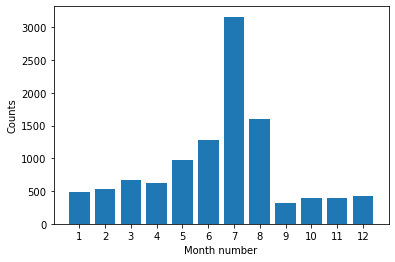

In [113]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months, data.groupby(['launch_month']).count()['App'])
plt.xticks(months)
plt.ylabel('Counts')
plt.xlabel('Month number')
plt.show()


#### Q. 2: What are the most prefered category of application

In [130]:
data["Category"].value_counts()
data.groupby(['Category']).count()['App'].sort_values(ascending=False)

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: App, dtype: int64

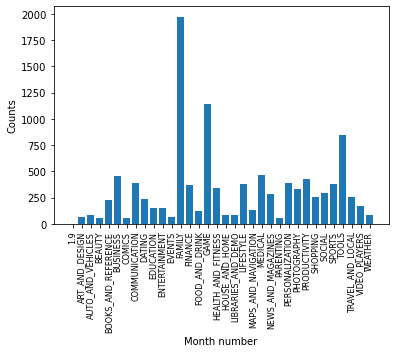

In [126]:
keys = [category for category, df in data.groupby(['Category'])]

plt.bar(keys, data.groupby(['Category']).count()['App'])
plt.xticks(months)
plt.ylabel('Counts')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()


#### Q. 3: What application should we recommend to maximize likelihood of user feed

In [134]:
data.groupby('Category').sum()

,Rating,Reviews,Price,Release_year,launch_month
Category,,,,,
1.9,19.0,3000000,0.00,2018,2
ART_AND_DESIGN,270.2,1714440,5.97,131158,386
AUTO_AND_VEHICLES,305.9,1163666,13.47,171513,552
BEAUTY,179.7,396240,0.00,106940,322
BOOKS_AND_REFERENCE,773.6,21959069,119.77,465926,1455
BUSINESS,1248.8,13954552,185.27,927987,2859
COMICS,241.0,3383276,0.00,121067,406
COMMUNICATION,1364.0,815462260,83.14,780743,2537
DATING,774.3,7291278,31.43,472187,1593


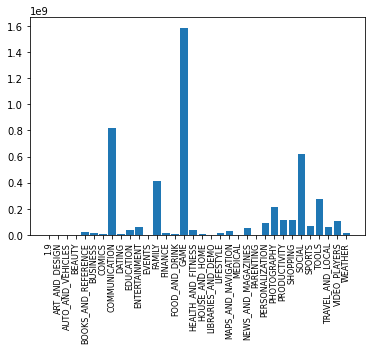

In [138]:
# Sum of user reviews
category_group = data.groupby('Category')
total_reviews = category_group.sum()['Reviews']

keys = [pair for pair, df in category_group]
plt.bar(keys, total_reviews)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

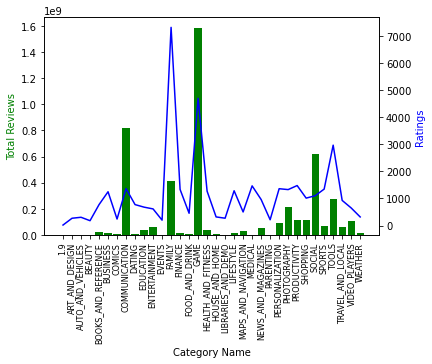

In [160]:
%matplotlib inline
ratings = data.groupby('Category').sum()['Rating']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, total_reviews, color='g')
ax2.plot(keys, ratings, color='b')

ax1.set_xlabel('Category Name')
ax1.set_ylabel('Total Reviews', color='g')
ax2.set_ylabel('Ratings', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

In [142]:
#Opinion: Based on result, Popular recommedation can be Games, Communication and Social application
#and Top Picks recommendations can be Family, games and tools applications

# 